<a href="https://colab.research.google.com/github/Nikhil2374/Computer-Vision/blob/main/image_enhancement_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

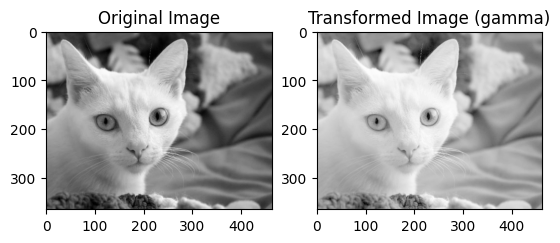

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_transformation(image, transformation, c=1, gamma=1):
    if transformation == 'negative':
        return 255 - image
    elif transformation == 'log':
        return c * np.log1p(image)
    elif transformation == 'gamma':
        return c * np.power(image / 255.0, gamma) * 255.0
    elif transformation == 'histogram_equalization':
        return cv2.equalizeHist(image)
    else:
        raise ValueError("Unsupported transformation type")

def main():
    # Load the grayscale image
    image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

    # Check if the image loaded successfully
    if image is None:
        print("Error: Could not load image. Check the file path and ensure the image is not corrupted.")
        return

    # Choose the transformation method
    transformation = 'gamma'  # options: 'negative', 'log', 'gamma', 'histogram_equalization'
    c = 1  # constant for log and gamma transformations
    gamma = 0.5  # gamma value for gamma transformation

    # Apply the chosen transformation
    transformed_image = apply_transformation(image, transformation, c, gamma)

    # Normalize the log and gamma transformed images to the range [0, 255]
    if transformation in ['log', 'gamma']:
        transformed_image = cv2.normalize(transformed_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Save or display the enhanced image
    cv2.imwrite('output_image.jpg', transformed_image)

    # Display the original and transformed images
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(f"Transformed Image ({transformation})")
    plt.imshow(transformed_image, cmap='gray')

    plt.show()

if __name__ == "__main__":
    main()